c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Luan Lima\AppData\Local\Programs\Python\Python310\lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.
c:\Users\Luan Lima\AppDat

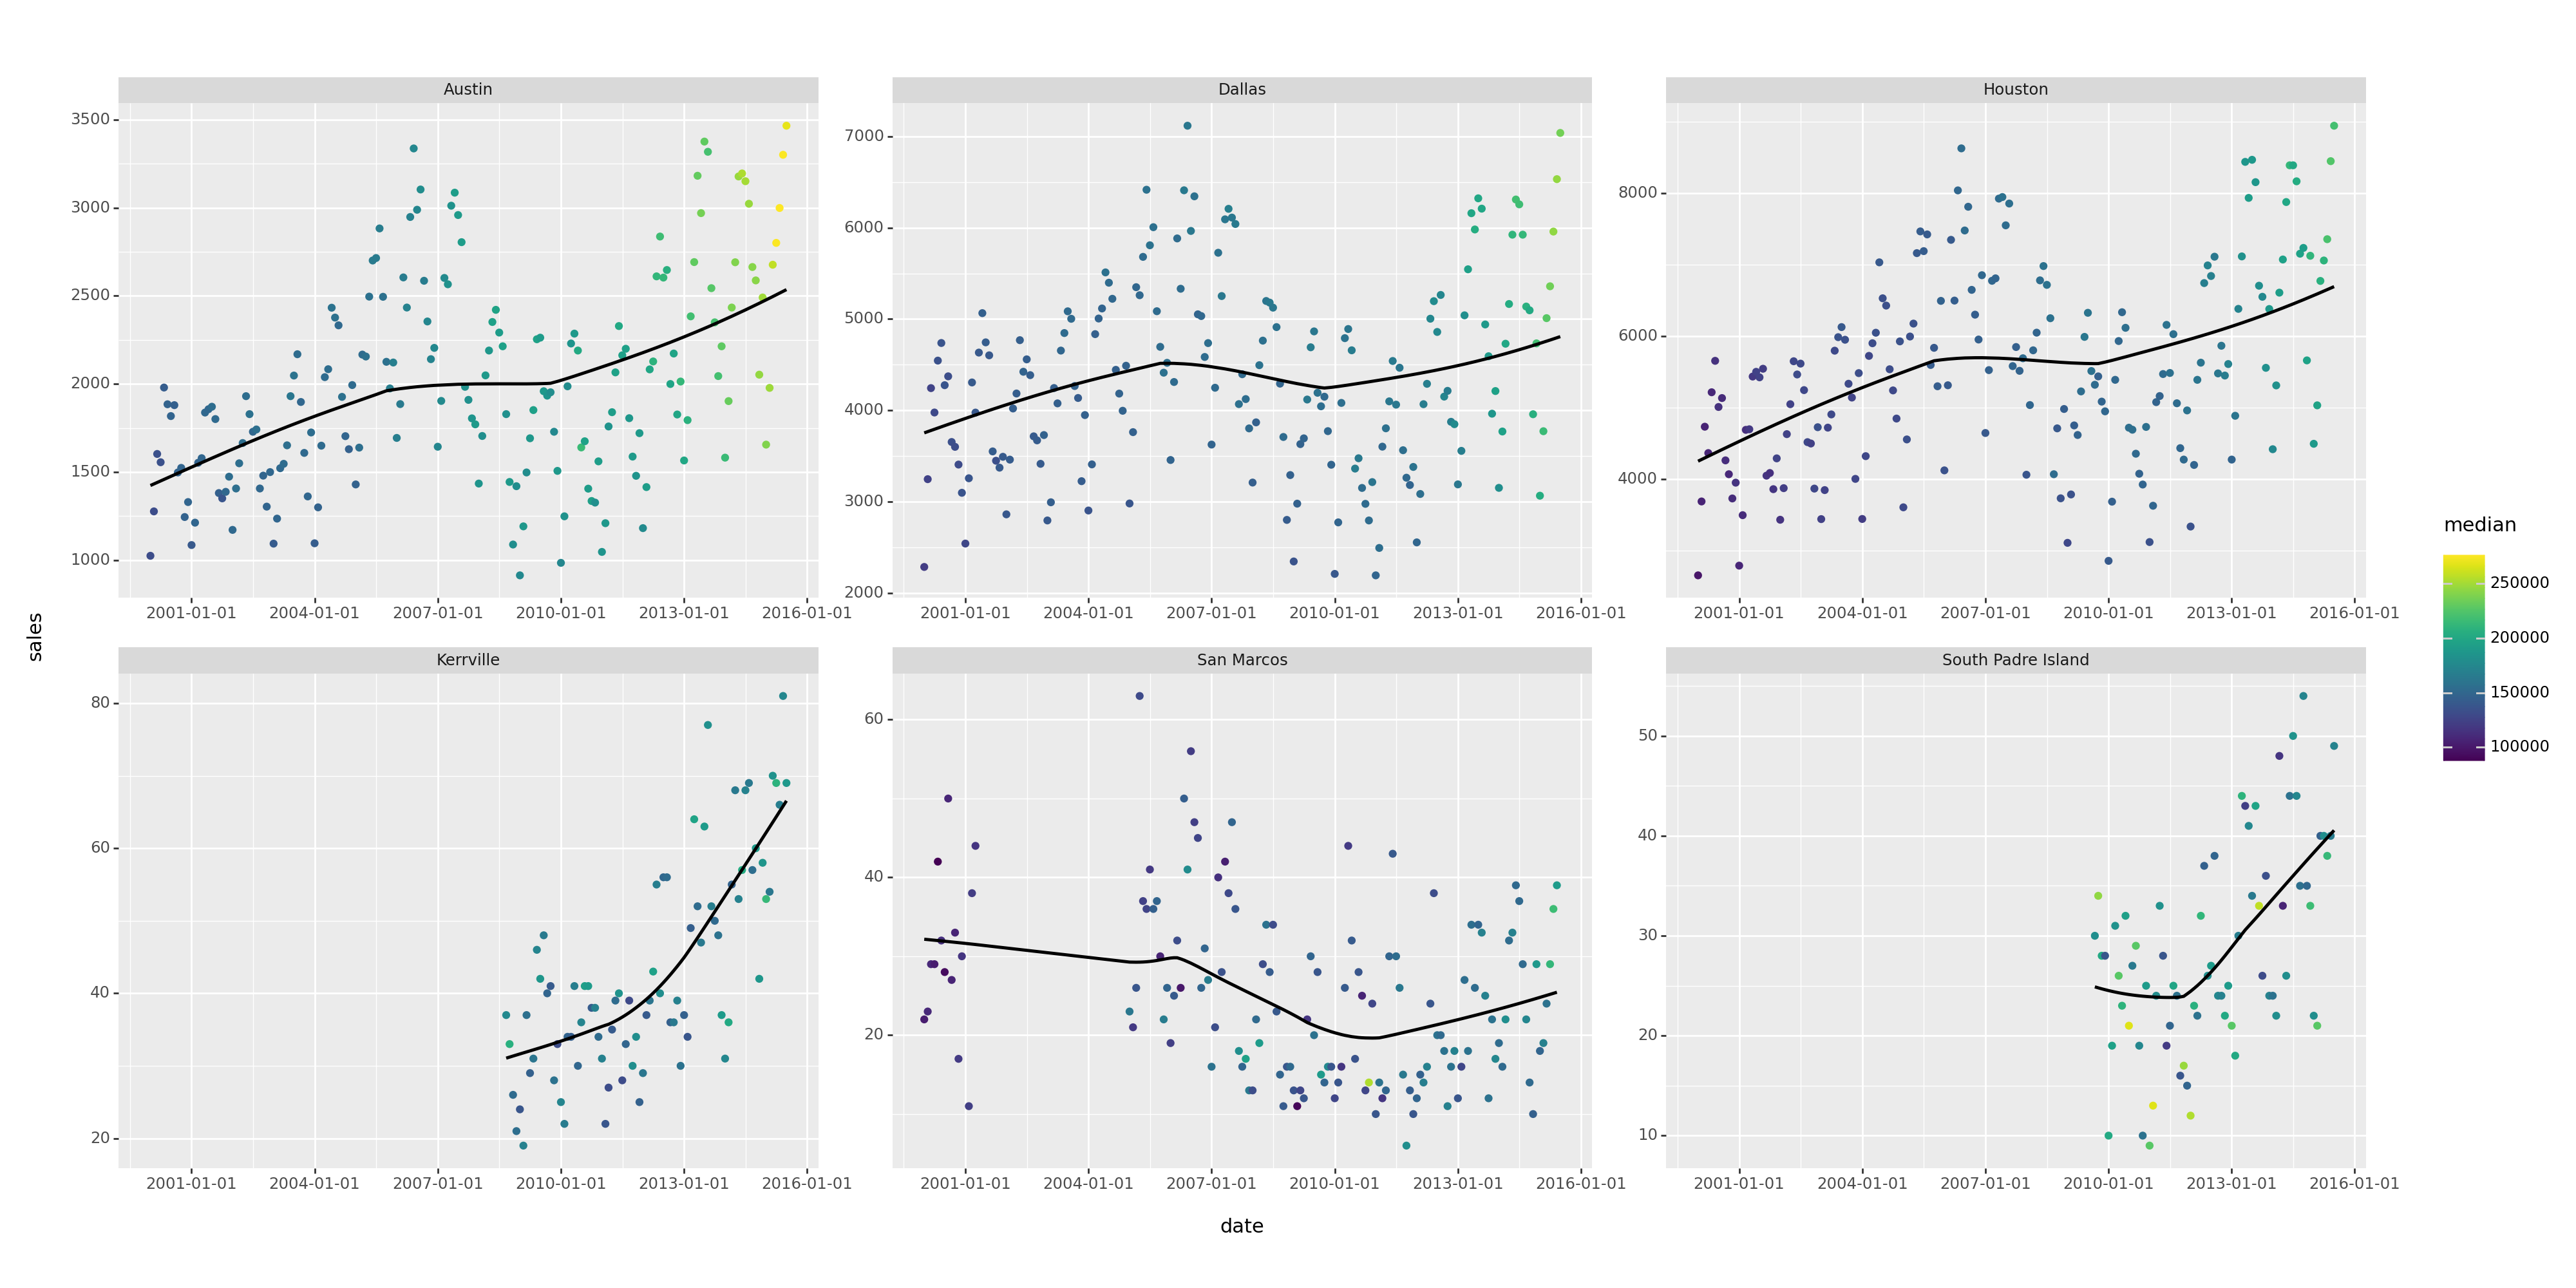

<Figure Size: (2000 x 1000)>

In [4]:
import pandas as pd
from mizani.breaks import date_breaks
from plotnine.data import txhousing
from plotnine import ggplot, aes, after_stat, geom_bar, geom_text, geom_point, geom_smooth, scale_x_datetime, facet_wrap,  scale_color_continuous, theme

# Modifying Existing Date column 
txhousing["date"] = pd.to_datetime(txhousing[["year", "month"]].assign(day=1), format="%Y-%m-%d")

# Get Total Sales for Every City and Fetch Top 3 and Bottom 3
sales_by_cities = (txhousing
                    .groupby("city")
                    .agg(sales=("sales", "sum"))
                    .sort_values("sales", ascending=False)
                    .reset_index()
                  )
cities = list(sales_by_cities.head(3)["city"]) + list(sales_by_cities.tail(3)["city"])
sample_data = txhousing[(txhousing["city"].isin(cities))]

# Create a plot
(
    ggplot(sample_data, aes(x="date", y="sales"))
    + geom_point(aes(color="median"))
    + geom_smooth(method="lowess")
    + scale_x_datetime(breaks=date_breaks("3 years"))    
    + facet_wrap("city", scales="free", ncol=3)
    + scale_color_continuous()
    + theme(figure_size=(20, 10), subplots_adjust={"wspace": 0.25, "hspace": 0.25})
)